In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

import sys
sys.path.append('../')
import utils

In [6]:
credit_score = pd.read_csv("../../data/credit_score.csv")

# disply max six columns
pd.set_option('display.max_columns', 10)
credit_score.head()


,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,...,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,...,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,...,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,...,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,...,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,...,1,1,1,473,0


## Linear relationships

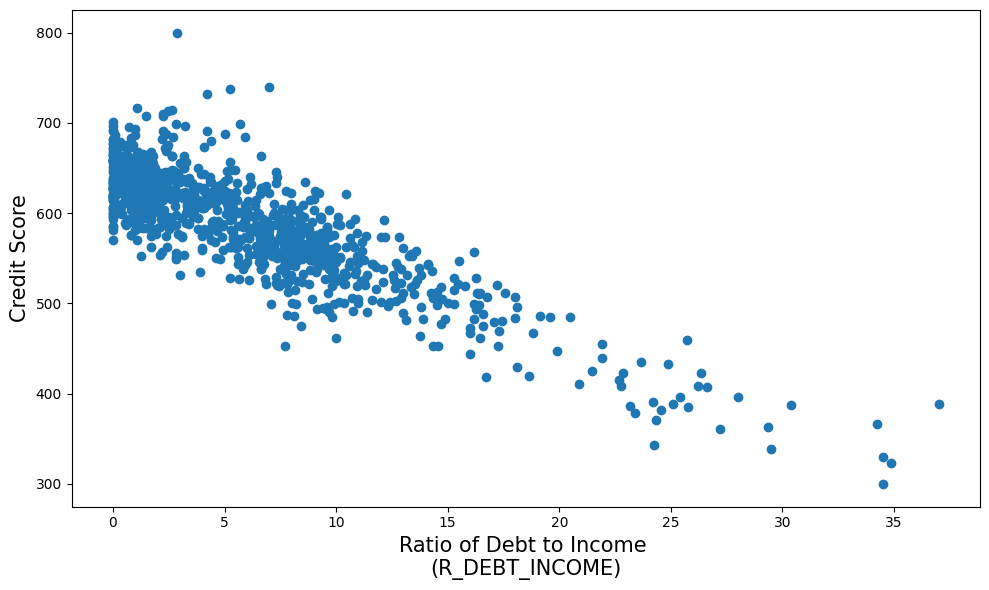

In [147]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(credit_score["R_DEBT_INCOME"], credit_score["CREDIT_SCORE"])
plt.xlabel("Ratio of Debt to Income \n(R_DEBT_INCOME)",size=15)
plt.ylabel("Credit Score",size=15)

# Save figure
utils.save_fig("LM1_linear_relationship")

In [119]:
# Select features and target
X = credit_score[["INCOME","R_DEBT_INCOME"]]
y = credit_score["CREDIT_SCORE"]

# Fit regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CREDIT_SCORE   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1457.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          1.38e-296
Time:                        15:51:39   Log-Likelihood:                -4884.8
No. Observations:                1000   AIC:                             9776.
Df Residuals:                     997   BIC:                             9790.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           637.1808      1.775    359.032

## Reformulating linear relationships

In [121]:
# Add entertainment ratio to features
X["R_ENTERTAINMENT_INV"] = credit_score["T_ENTERTAINMENT_12"] / credit_score["T_ENTERTAINMENT_6"]
X["R_ENTERTAINMENT_INV"] = X["R_ENTERTAINMENT_INV"].fillna(X["R_ENTERTAINMENT_INV"].mean())

y = credit_score["CREDIT_SCORE"]

# Fit regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CREDIT_SCORE   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1042.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          1.33e-306
Time:                        15:53:54   Log-Likelihood:                -4857.9
No. Observations:                1000   AIC:                             9724.
Df Residuals:                     996   BIC:                             9743.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 561.4627    

In [148]:
#Inverse ratio
credit_score["T_ENTERTAINMENT_6"] / credit_score["T_ENTERTAINMENT_12"]

#Alternative ratio
credit_score["T_ENTERTAINMENT_6"] / (credit_score["T_ENTERTAINMENT_12"]- credit_score["T_ENTERTAINMENT_6"])

0      1.026420
1      1.016842
2      1.616667
3      1.038199
4      1.061929
         ...   
995    1.015251
996    1.761563
997         NaN
998    1.042711
999    1.030886
Length: 1000, dtype: float64

In [93]:
X = credit_score[["INCOME","R_DEBT_INCOME","R_ENTERTAINMENT"]]

y = credit_score["CREDIT_SCORE"]

# Fit regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CREDIT_SCORE   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     1052.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):          3.84e-308
Time:                        15:25:36   Log-Likelihood:                -4854.3
No. Observations:                1000   AIC:                             9717.
Df Residuals:                     996   BIC:                             9736.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             704.8321      8.718     

## Polynomial regression

In [122]:
# Add expenditure ratio and squared expenditure ratio to features
X = credit_score[["INCOME","R_DEBT_INCOME","R_ENTERTAINMENT","R_EXPENDITURE"]]
X['R_EXPENDITURE_SQR'] = credit_score["R_EXPENDITURE"]**2

y = credit_score["CREDIT_SCORE"]

# Fit regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CREDIT_SCORE   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     797.7
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:57:02   Log-Likelihood:                -4762.2
No. Observations:                1000   AIC:                             9536.
Df Residuals:                     994   BIC:                             9566.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               695.3761     22.93

/var/folders/_j/wkrsnnnn2lj6cds3dhhlkkh40000gn/T/ipykernel_20686/3118396856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['R_EXPENDITURE_SQR'] = credit_score["R_EXPENDITURE"]**2


## Categorical features 

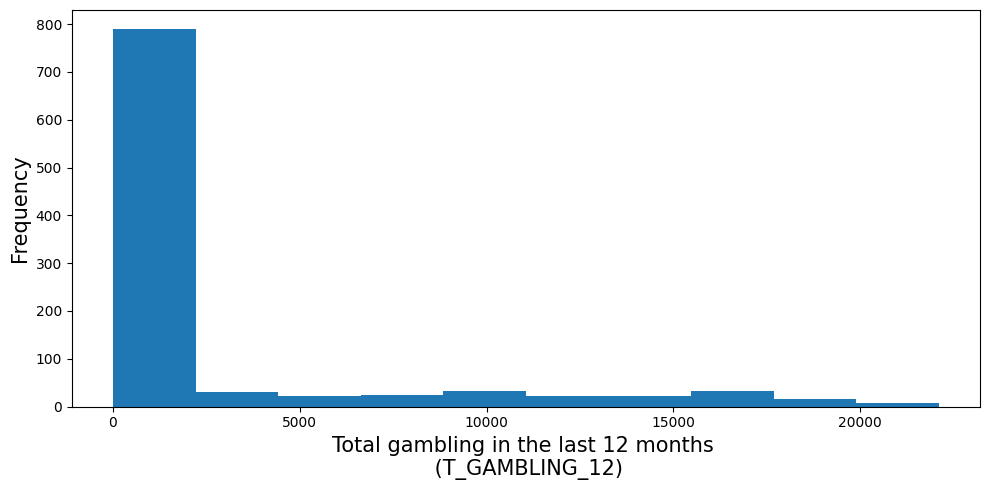

In [145]:
# Histogram of gambling feature
plt.figure(figsize=(10, 5))

plt.hist(credit_score["T_GAMBLING_12"])
plt.xlabel("Total gambling in the last 12 months \n (T_GAMBLING_12)",size=15)
plt.ylabel("Frequency",size=15)

# Save figure
utils.save_fig("LM1_gambling_histogram")

In [123]:
# one-hot encoding of categorical variable
X['GAMBLING_LOW'] = credit_score['CAT_GAMBLING'].apply(lambda x: 1 if x == 'Low' else 0)
X['GAMBLING_HIGH']  = credit_score['CAT_GAMBLING'].apply(lambda x: 1 if x == 'High' else 0)

y = credit_score["CREDIT_SCORE"]

# Fit regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CREDIT_SCORE   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     672.1
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:58:13   Log-Likelihood:                -4694.1
No. Observations:                1000   AIC:                             9404.
Df Residuals:                     992   BIC:                             9444.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               674.9545     21.51

# Interactions

In [124]:
# Add interaction term to features
X = credit_score[["INCOME","DEBT"]]
X["INCOME.DEBT"] = X["INCOME"] * X["DEBT"]

y = credit_score["CREDIT_SCORE"]

# Fit regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CREDIT_SCORE   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     173.1
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           2.48e-90
Time:                        15:59:11   Log-Likelihood:                -5358.3
No. Observations:                1000   AIC:                         1.072e+04
Df Residuals:                     996   BIC:                         1.074e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         590.1795      2.768    213.251      

/var/folders/_j/wkrsnnnn2lj6cds3dhhlkkh40000gn/T/ipykernel_20686/2124123607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["INCOME.DEBT"] = X["INCOME"] * X["DEBT"]


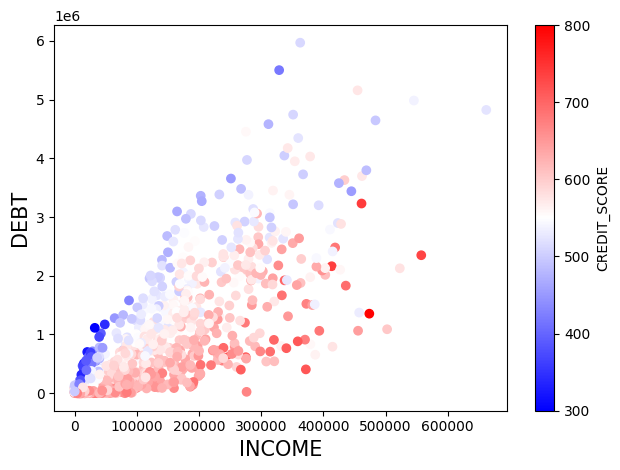

In [9]:
# Interaction between income and debt
plt.scatter(credit_score["INCOME"],
            credit_score["DEBT"], 
            c=credit_score["CREDIT_SCORE"], cmap="bwr")
plt.colorbar(label="CREDIT_SCORE", orientation="vertical")

plt.xlabel("INCOME",size=15)
plt.ylabel("DEBT",size=15)

# Save figure
utils.save_fig("LM1_interaction")

# Finding non-linear relationship

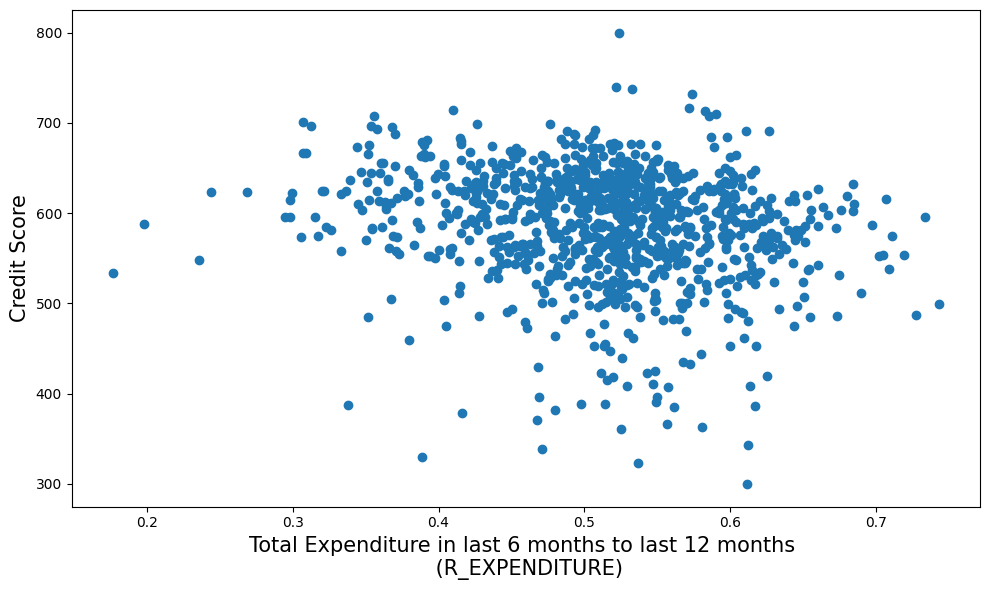

In [146]:
# Scatter plot of expenditure ratio and credit score
plt.figure(figsize=(10, 6))
plt.scatter(credit_score["R_EXPENDITURE"], credit_score["CREDIT_SCORE"])
plt.xlabel("Total Expenditure in last 6 months to last 12 months \n (R_EXPENDITURE)",size=15)
plt.ylabel("Credit Score",size=15)

# Save figure
utils.save_fig("LM1_expenditure_scatter")

In [149]:
# Add expenditure ratio and squared expenditure ratio to features
X = credit_score[["R_EXPENDITURE"]]
X['R_EXPENDITURE_SQR'] = credit_score["R_EXPENDITURE"]**2

y = credit_score["CREDIT_SCORE"]

# Fit regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           CREDIT_SCORE   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     16.85
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           6.37e-08
Time:                        15:28:52   Log-Likelihood:                -5551.5
No. Observations:                1000   AIC:                         1.111e+04
Df Residuals:                     997   BIC:                         1.112e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               623.8504     48.51

/var/folders/_j/wkrsnnnn2lj6cds3dhhlkkh40000gn/T/ipykernel_20686/1811903322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['R_EXPENDITURE_SQR'] = credit_score["R_EXPENDITURE"]**2


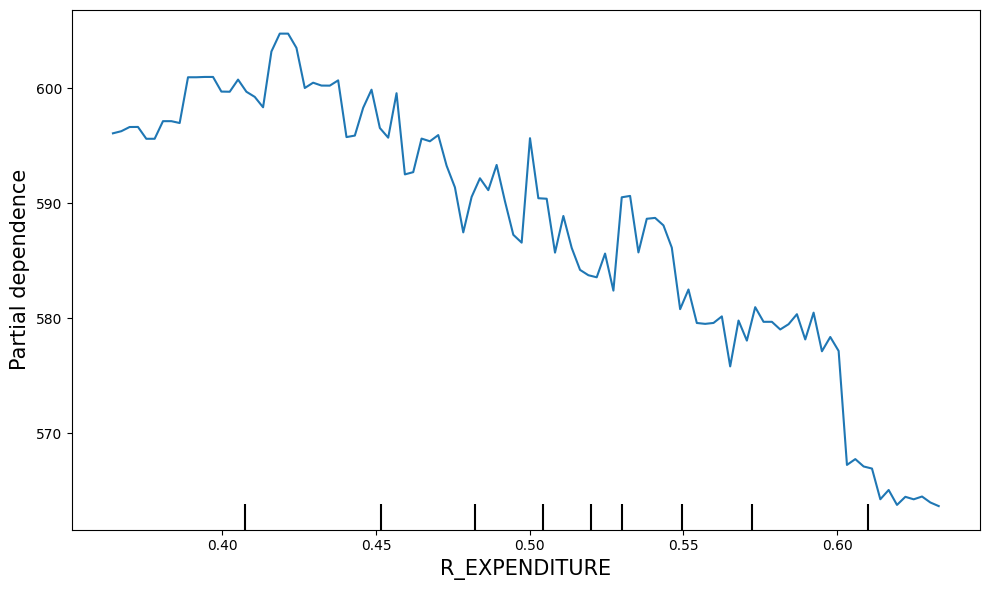

In [143]:
import xgboost as xgb
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

X = credit_score[['INCOME','R_DEBT_INCOME','R_EXPENDITURE','R_ENTERTAINMENT','CAT_GAMBLING']].copy()

# one-hot encoding
X['GAMBLING_LOW'] = X['CAT_GAMBLING'].apply(lambda x: 1 if x == 'Low' else 0)
X['GAMBLING_HIGH']  = X['CAT_GAMBLING'].apply(lambda x: 1 if x == 'High' else 0)
X.drop(columns=['CAT_GAMBLING'], inplace=True)

y = credit_score["CREDIT_SCORE"]

# Fit xgb model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X, y)

# plot partial dependence
fig, ax = plt.subplots(figsize=(10, 6))
display = PartialDependenceDisplay.from_estimator(xgb_model, X, ['R_EXPENDITURE'],kind='average',ax=ax)
plt.xlabel("R_EXPENDITURE",size=15)
plt.ylabel("Partial dependence",size=15)

# Save figure
utils.save_fig("LM1_expenditure_pdp")
